In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vapour_pressure as vp

### 水分状態を換算するモデュール  
換算する前の水分状態と換算後の水分状態を指定し、温度と水分状態を与えることで値を換算するクラス  
$T$：絶対温度[K]  
$R_v$：水蒸気の気体定数  
$RH$：相対湿度[-]  
$P_v$：水蒸気圧[Pa]  
$P_{vs}$：飽和水蒸気圧[Pa]  
$\mu$：水分化学ポテンシャル[J/kg]  

RH（相対湿度） - Pv（水蒸気圧）　関係  
$RH = \frac{P_v}{P_{vs}}$  

RH（相対湿度） - Miu（水分化学ポテンシャル）　関係  
$\mu = R_v T log(RH)$

In [2]:
### 水分状態を換算するクラス ###################### 
def Rv():
    return 8316.0/18.016
    
#########################################################
#   RH（相対湿度）からPv（水蒸気圧）への変換  
def cal_RHtoPv( temp, RH ):
    return RH * vp.Pvs(temp)

#   Pv（水蒸気圧）からRH（相対湿度）への変換
def cal_PvtoRH( temp, Pv ):
    return Pv / vp.Pvs(temp)

#########################################################
#   RH（相対湿度）からMiu（水分化学ポテンシャル）への変換
def cal_RHtoMiu( temp, RH ):
    return Rv() * temp * np.log( RH )

#   Miu（水分化学ポテンシャル）からRH（相対湿度）への変換
def cal_MiutoRH( temp, Miu):
    return np.exp( Miu / ( Rv() * temp ) )

#########################################################
#   Pv（水蒸気圧）からMiu（水分化学ポテンシャル）への変換
def cal_PvtoMiu( temp, Pv ):
    return Rv() * temp * np.log( Pv / vp.Pvs(temp) )

#   Miu（水分化学ポテンシャル）からPv（水蒸気圧）への変換
def cal_MiutoPv( temp, Miu ):
    return vp.Pvs(temp) * np.exp( Miu / ( Rv() * temp ) )


In [3]:
# 使用例
cal_MiutoRH(293.15, -1500.0)

0.988975971012088

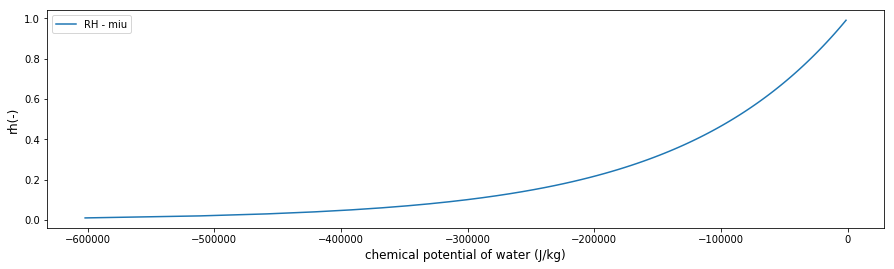

In [4]:
# 参考（相対湿度ー水分化学ポテンシャル関係）
# draw graph
temp = 283.15
rh = np.arange(0.01, 1.0, 0.01)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.plot( cal_RHtoMiu( temp, rh), rh , label = 'RH - miu' )
ax.set_xlabel( 'chemical potential of water (J/kg)', fontsize = 12 )
ax.set_ylabel( 'rh(-)', fontsize = 12 )
plt.legend()
plt.show()

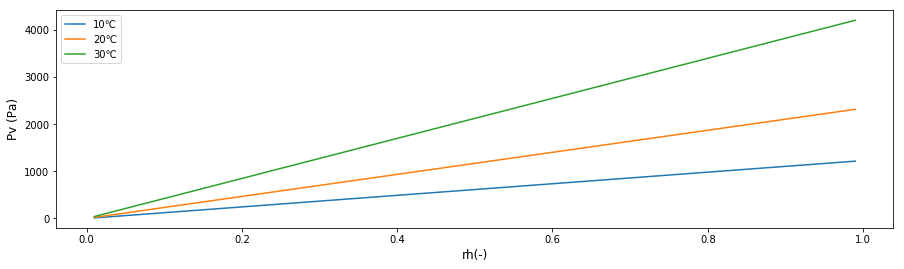

In [5]:
# 参考（相対湿度ー水蒸気圧関係）
# draw graph
temp1 = 283.15
temp2 = 293.15
temp3 = 303.15
rh = np.arange(0.01, 1.0, 0.01)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.plot( rh, cal_RHtoPv( temp1, rh) , label = '10℃' )
ax.plot( rh, cal_RHtoPv( temp2, rh) , label = '20℃' )
ax.plot( rh, cal_RHtoPv( temp3, rh) , label = '30℃' )
ax.set_xlabel( 'rh(-)', fontsize = 12 )
ax.set_ylabel( 'Pv (Pa)', fontsize = 12 )
plt.legend()
plt.show()